In [1]:
import classifier as c
from keras.callbacks import EarlyStopping, ModelCheckpoint

2024-02-06 21:22:54.669302: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
train_image_folder = '/raid/mpsych/OMAMA/DATA/data/train'
train_npz_folder = '/raid/mpsych/OMAMA/DATA/data/adjusted_2d_512'

In [3]:
img_height = 512
img_width = 512
batch_size = 32
NUMBER_OF_CLASSES = 2

In [4]:
train_files, val_files, test_files = c.Classifier.load_data(train_image_folder, train_npz_folder)

In [5]:
train_generator = c.Classifier.custom_data_generator(train_files, batch_size, img_height, img_width)
val_generator = c.Classifier.custom_data_generator(val_files, batch_size, img_height, img_width)
test_generator = c.Classifier.custom_data_generator(test_files, batch_size, img_height, img_width)

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001, mode='min')

In [8]:
model = c.Classifier.build_model(img_height, img_width, NUMBER_OF_CLASSES)

In [9]:
c.Classifier.train_model(model, train_generator, val_generator, batch_size, early_stopping)

2024-02-06 21:23:13.108063: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-02-06 21:23:13.127165: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245720000 Hz
2024-02-06 21:23:13.930814: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-02-06 21:23:15.141772: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-02-06 21:23:17.138055: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-02-06 21:23:17.138080: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-02-06 21:23:17.138877: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modif

300/300 [==============================] - 266s 551ms/step - loss: 0.2242 - accuracy: 0.9791 - val_loss: 0.1297 - val_accuracy: 0.9984


In [9]:
c.Classifier.evaluate_model(model, test_generator,test_files,batch_size)

468/468 [==============================] - 148s 315ms/step - loss: 0.1425 - accuracy: 0.9981
Test Accuracy: 0.9981303215026855


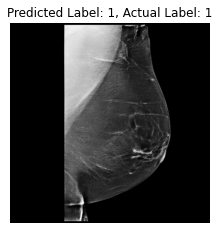

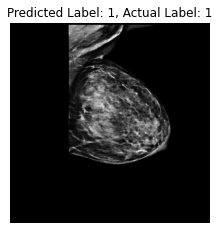

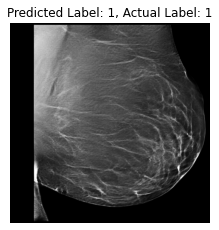

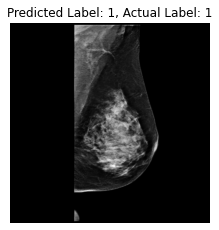

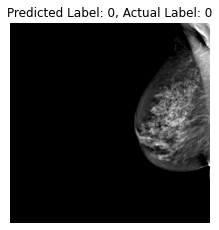

468/468 [==============================] - 180s 386ms/step
Predicted Labels: [1 1 0 ... 0 0 0]


In [12]:
# Display predictions
predicted_labels = c.Classifier.display_predictions(model,test_generator,test_files,batch_size)
print("Predicted Labels:", predicted_labels)